<center>
   Go back to the [Index](https://github.com/kadrlica/skymap/tree/master/examples/README.md)
</center>

# Chapter 2: Skymap Subclasses

In this chapter we introduce the subclasses of `skymap.Skymap` and explore some of their features for astronomical plotting.


In [1]:
# Basic notebook imports
%matplotlib inline

import matplotlib
import pylab as plt
import numpy as np
import healpy as hp

We start by importing several classes from the skymap module and setting a few constants that we will use in this example.

In [2]:
# Import skymap and some of it's basic map classes
import cartosky

from cartosky import Skymap,McBrydeSkymap,OrthoSkymap
#from cartosky import SurveySkymap,SurveyMcBryde,SurveyOrtho
#from cartosky import DESSkymap

SKYMAPS = [Skymap,McBrydeSkymap,OrthoSkymap]
SURVEYS = [] #[SurveySkymap,SurveyMcBryde,SurveyOrtho]
ZOOMS   = [] #[DESSkymap]

In the last chapter we saw how we could create skymaps with different projections using the `projection` keywork argument to the `Skymap` initializer. However, for ease of use we have also defined a set of subclasses for commonly used projections.

/usr/local/anaconda2/envs/carto/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/local/anaconda2/envs/carto/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/anaconda2/envs/carto/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


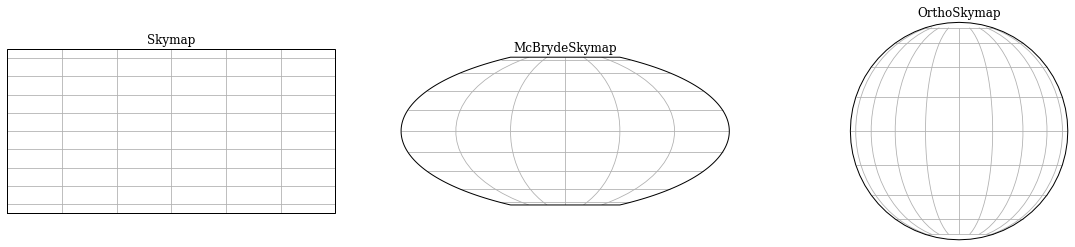

In [3]:
fig,axes = plt.subplots(1,3,figsize=(20,4))
for i,cls in enumerate(SKYMAPS):
    plt.sca(axes[i])
    smap = cls()
    plt.title(cls.__name__)

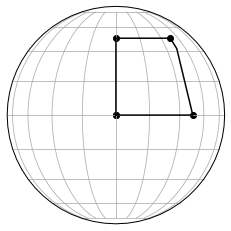

In [4]:
smap = SKYMAPS[2]()
smap.draw_polygon_radec([0,45,45,0,0],[0,0,45,45,0])
smap.scatter([0,45,45,0,0],[0,0,45,45,0])

In [5]:
smap.projection.proj4_params['lon_0']

0

In addition to facilitating the generation of specific projections, `Skymap` also has a number of astronomically oriented methods. For example, you can draw an outline of the Milky Way

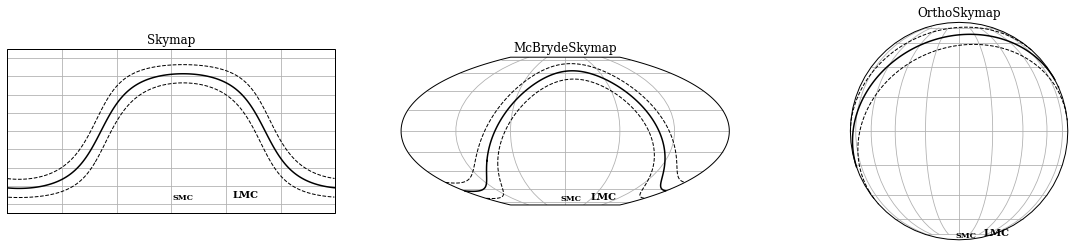

In [6]:
fig,axes = plt.subplots(1,3,figsize=(20,4))
for i,cls in enumerate(SKYMAPS):
    plt.sca(axes[i])
    smap = cls()
    smap.draw_milky_way()
    smap.draw_lmc()
    smap.draw_smc()
    plt.title(cls.__name__)

In addition to methods to plot astronomical objects, `Skymap` has a number of methods to plot useful quantities when observing. (Careful, the 'cyl' projection can be a bit weird when the tissot used to plot the airmass crosses lon=0.)

TypeError: __init__() got an unexpected keyword argument 'date'

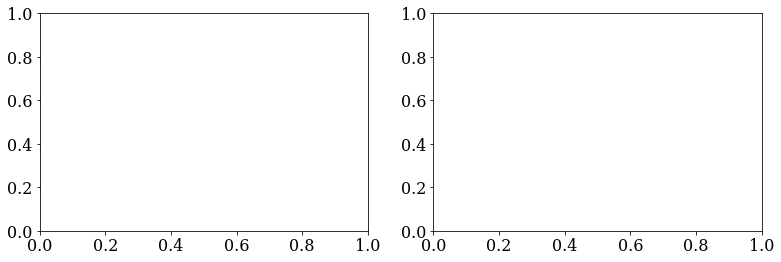

In [7]:
fig,axes = plt.subplots(1,3,figsize=(20,4))
for i,cls in enumerate(SKYMAPS):
    plt.sca(axes[i])
    smap = cls(date='2018/11/02 01:00:00')
    smap.draw_airmass(airmass=1.4,color='b')
    smap.draw_zenith(alpha=1.0,radius=2.0,color='g',)
    smap.draw_lmc()
    smap.draw_smc()

In addition to the projection subclasses of `Skymap`, there are also survey-specific subclasses. The `SurveySkymap` object has a number of methods for plotting individual surveys.

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,4))
for i,cls in enumerate(SURVEYS):
    plt.sca(axes[i])
    smap = cls()
    smap.draw_des(label='DES')
    smap.draw_maglites(label='MagLiteS')
    smap.draw_bliss(label='BLISS')
    plt.title('Footprints (%s)'%cls.__name__)
    plt.legend(loc='upper right')

Many surveys don't span the entire sky and it is useful to zoom in on the region specifically covered. To do this, we use the `SurveyZoom` subclasses.

In [ ]:
plt.figure()
smap = DESSkymap()
smap.draw_des(label='DES')
smap.draw_maglites(label='MagLiteS')
smap.draw_bliss(label='BLISS')
plt.suptitle('DES Zoom Footprint')
plt.legend(loc='upper left',fontsize=10)

Unfortunately, the `ZoomSkymap` is rather fragile because it relies on an `AxisArtist` to plot the curvilinear coordinate grid. Hopefully we can make it more robust in the future.

<center>
   Go back to the [Index](https://github.com/kadrlica/skymap/tree/master/examples/README.md)
</center>